# Example Notebook: How to analyse synthetic data
This notebook will show, fairly compact, how to analyse the data that you have someone obtained. 

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from table_evaluator import TableEvaluator, load_data

/Users/baukebrenninkmeijer/Developer/table-evaluator/.venv/lib/python3.12/site-packages/dython/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution


In [4]:
real, fake = load_data("data/real_test_sample.csv", "data/fake_test_sample.csv")

In [4]:
real.head()

trans_id  account_id  trans_amount  balance_after_trans  trans_type  \
0    951892        3245        3878.0              13680.0  WITHDRAWAL   
1   3547680         515          65.9              14898.6      CREDIT   
2   1187131        4066       32245.0              57995.5      CREDIT   
3    531421        1811        3990.8              23324.9  WITHDRAWAL   
4     37081         119       12100.0              36580.0  WITHDRAWAL   

              trans_operation     trans_k_symbol  trans_date  
0    REMITTANCE_TO_OTHER_BANK          HOUSEHOLD        2165  
1                     UNKNOWN  INTEREST_CREDITED        2006  
2  COLLECTION_FROM_OTHER_BANK            UNKNOWN        2139  
3    REMITTANCE_TO_OTHER_BANK       LOAN_PAYMENT         892  
4          WITHDRAWAL_IN_CASH            UNKNOWN         654

In [5]:
fake.head()

trans_id  account_id  trans_amount  balance_after_trans  trans_type  \
0    911598        3001       13619.0              92079.0      CREDIT   
1    377371        1042        4174.0              32470.0  WITHDRAWAL   
2    970113        3225         274.0              57608.0  WITHDRAWAL   
3    450090        1489         301.0              36258.0      CREDIT   
4   1120409        3634        6303.0              50975.0  WITHDRAWAL   

              trans_operation trans_k_symbol  trans_date  
0  COLLECTION_FROM_OTHER_BANK        UNKNOWN        1885  
1    REMITTANCE_TO_OTHER_BANK      HOUSEHOLD        1483  
2          WITHDRAWAL_IN_CASH        UNKNOWN        1855  
3              CREDIT_IN_CASH        UNKNOWN         885  
4    REMITTANCE_TO_OTHER_BANK      HOUSEHOLD        1211

In [6]:
cat_cols = ["trans_type", "trans_operation", "trans_k_symbol"]

In [7]:
evaluator = TableEvaluator(real, fake, cat_cols=cat_cols)

### We can do a numerical analysis

In [23]:
evaluator.evaluate(target_col="trans_type", notebook=False, verbose=False)


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.9450   0.9500              0.8957
DecisionTreeClassifier_real   0.9800   0.9450              0.8779
LogisticRegression_fake       0.8100   0.8000              0.9324
LogisticRegression_real       0.8500   0.8450              0.9704
MLPClassifier_fake            0.6250   0.6500              0.3652
MLPClassifier_real            0.6600   0.6700              0.3378
RandomForestClassifier_fake   0.9650   0.9600              0.9900
RandomForestClassifier_real   0.9850   0.9850              1.0000

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.5655
nearest neighbor std                     0.3726

Miscellaneous results:
                                  Result
Column Cor

### But we can also do a visual analysis

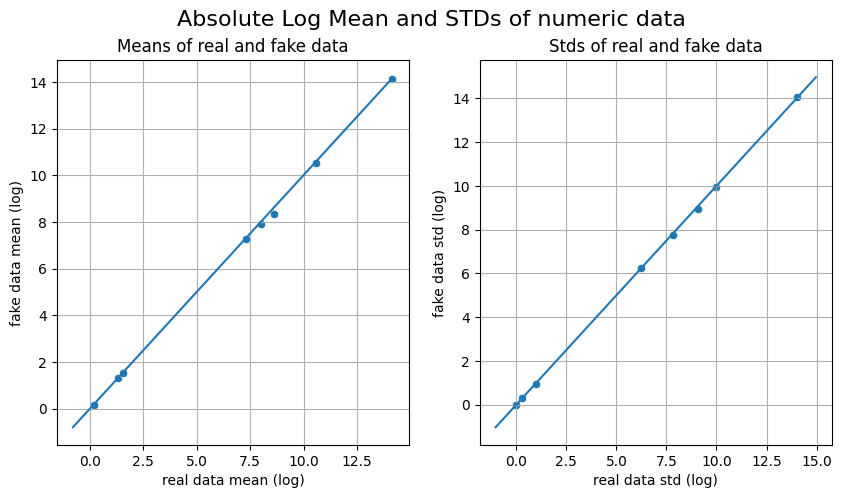

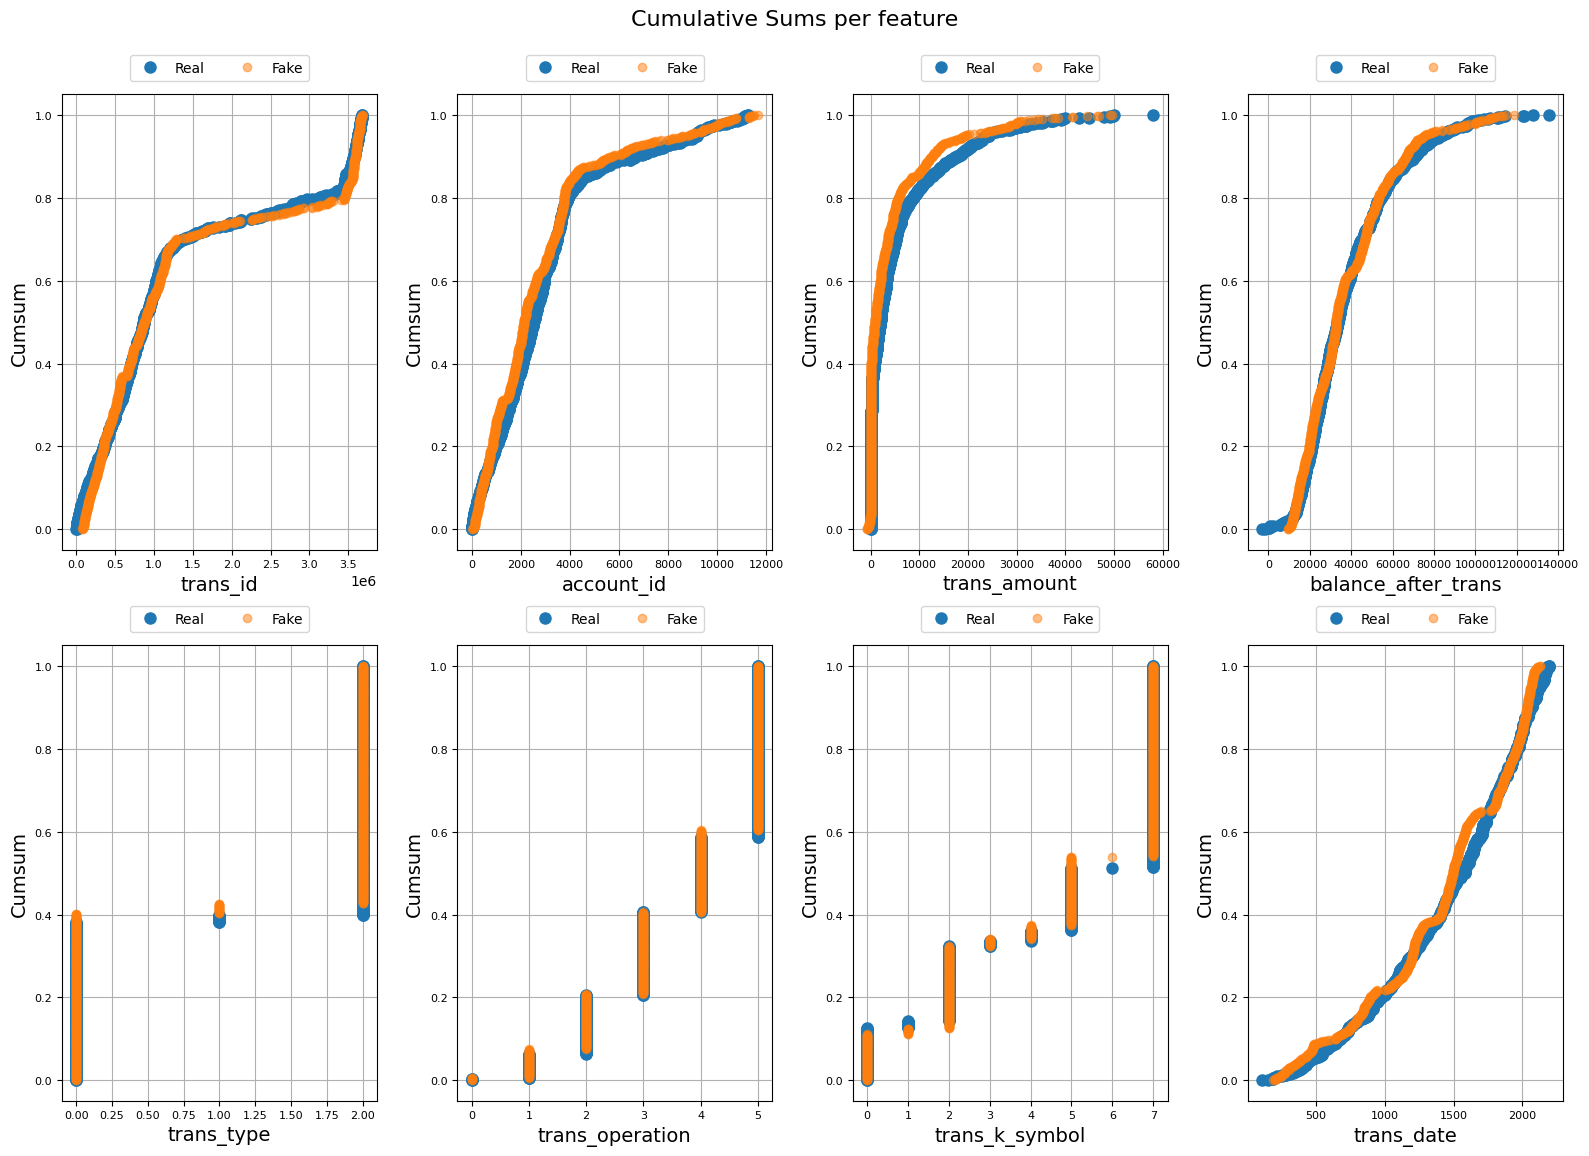

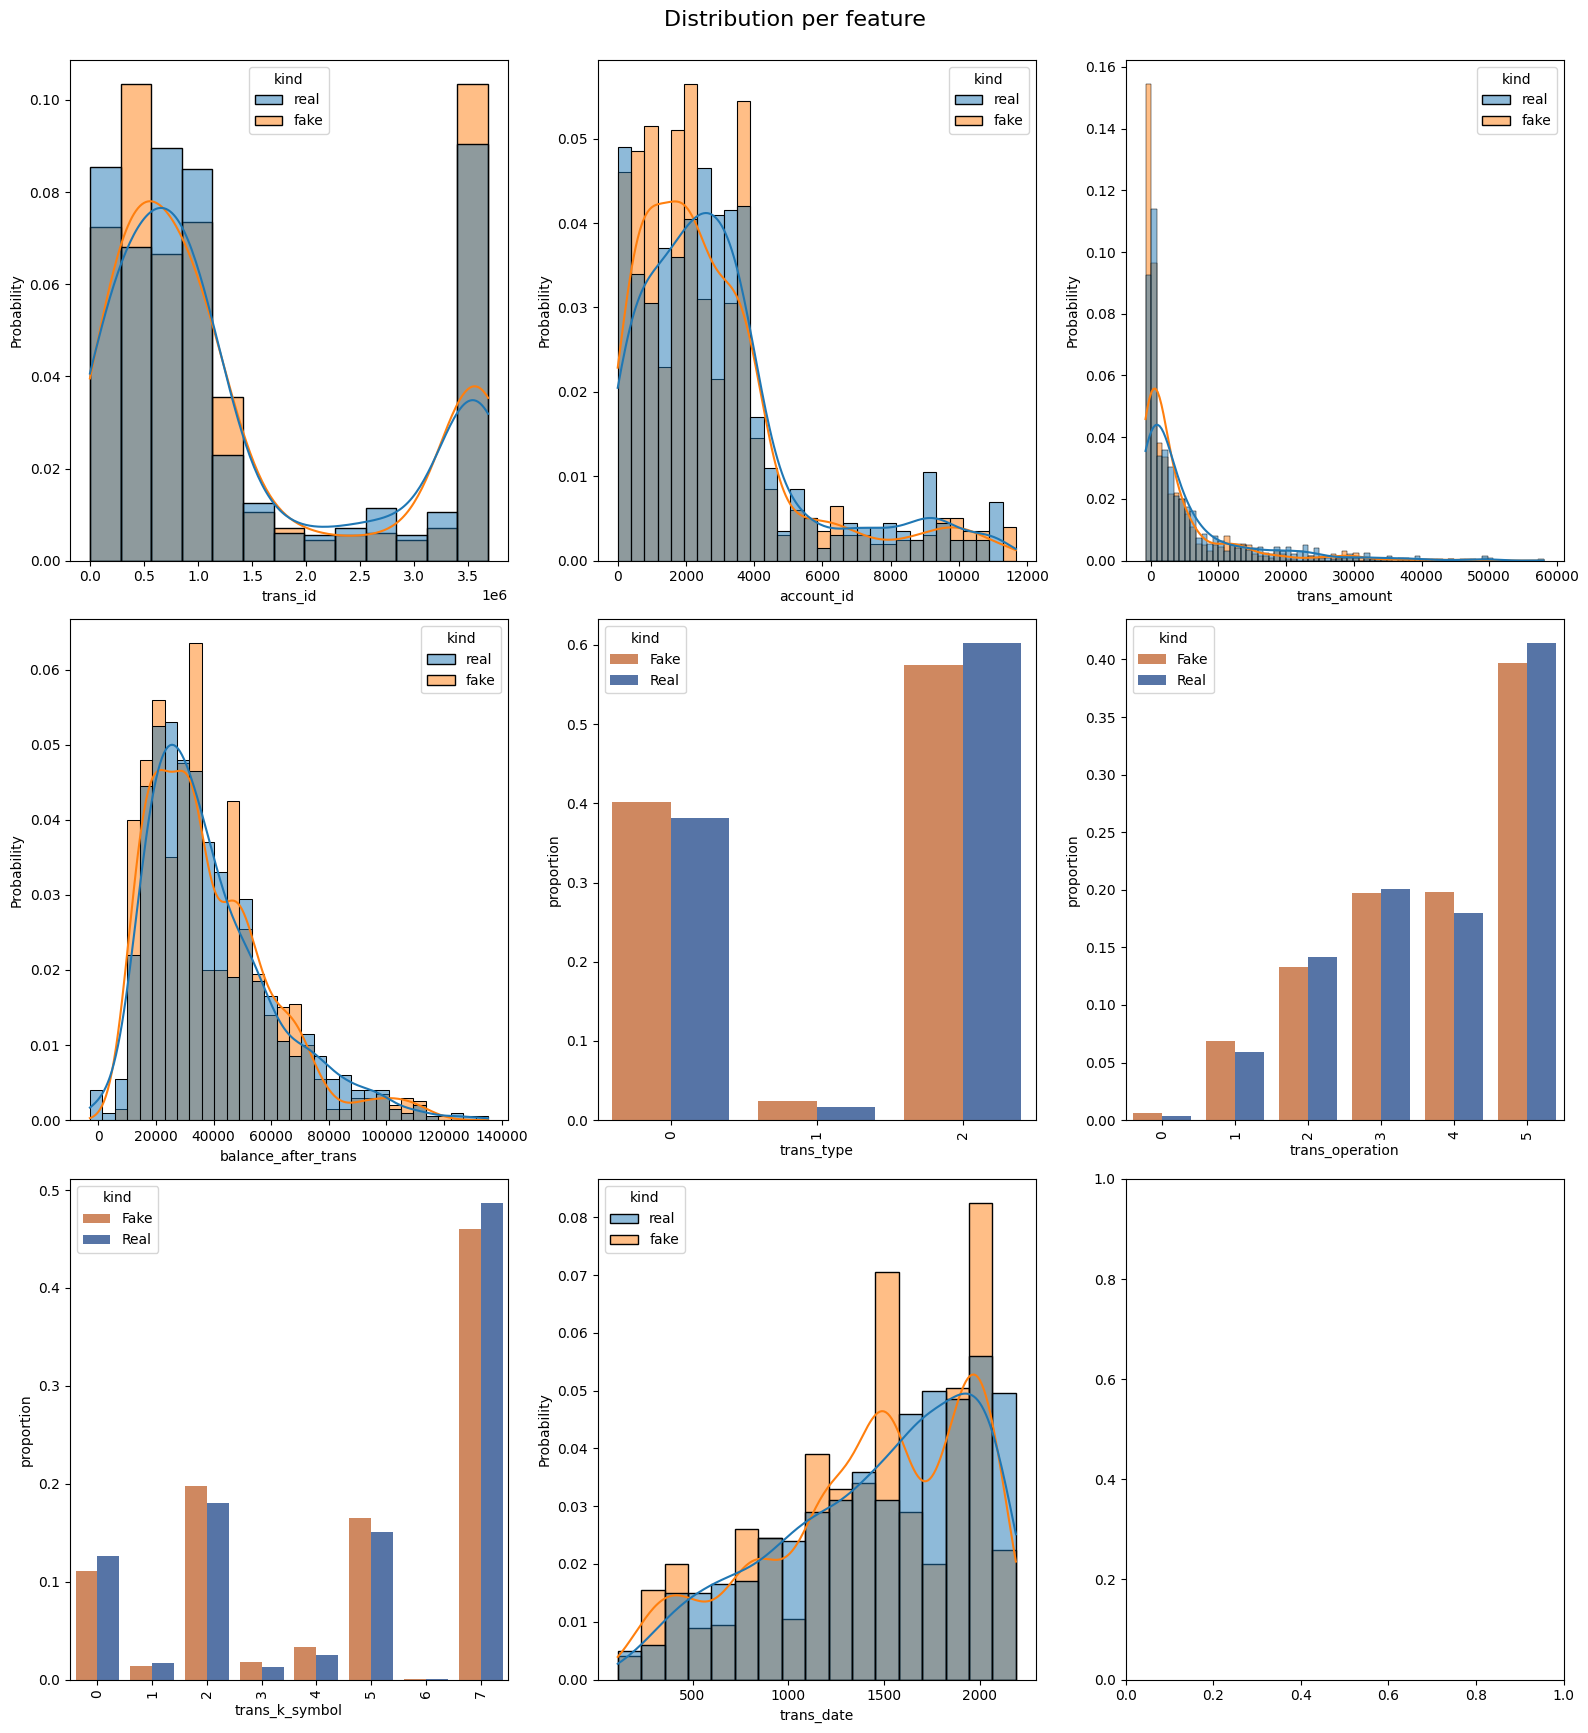

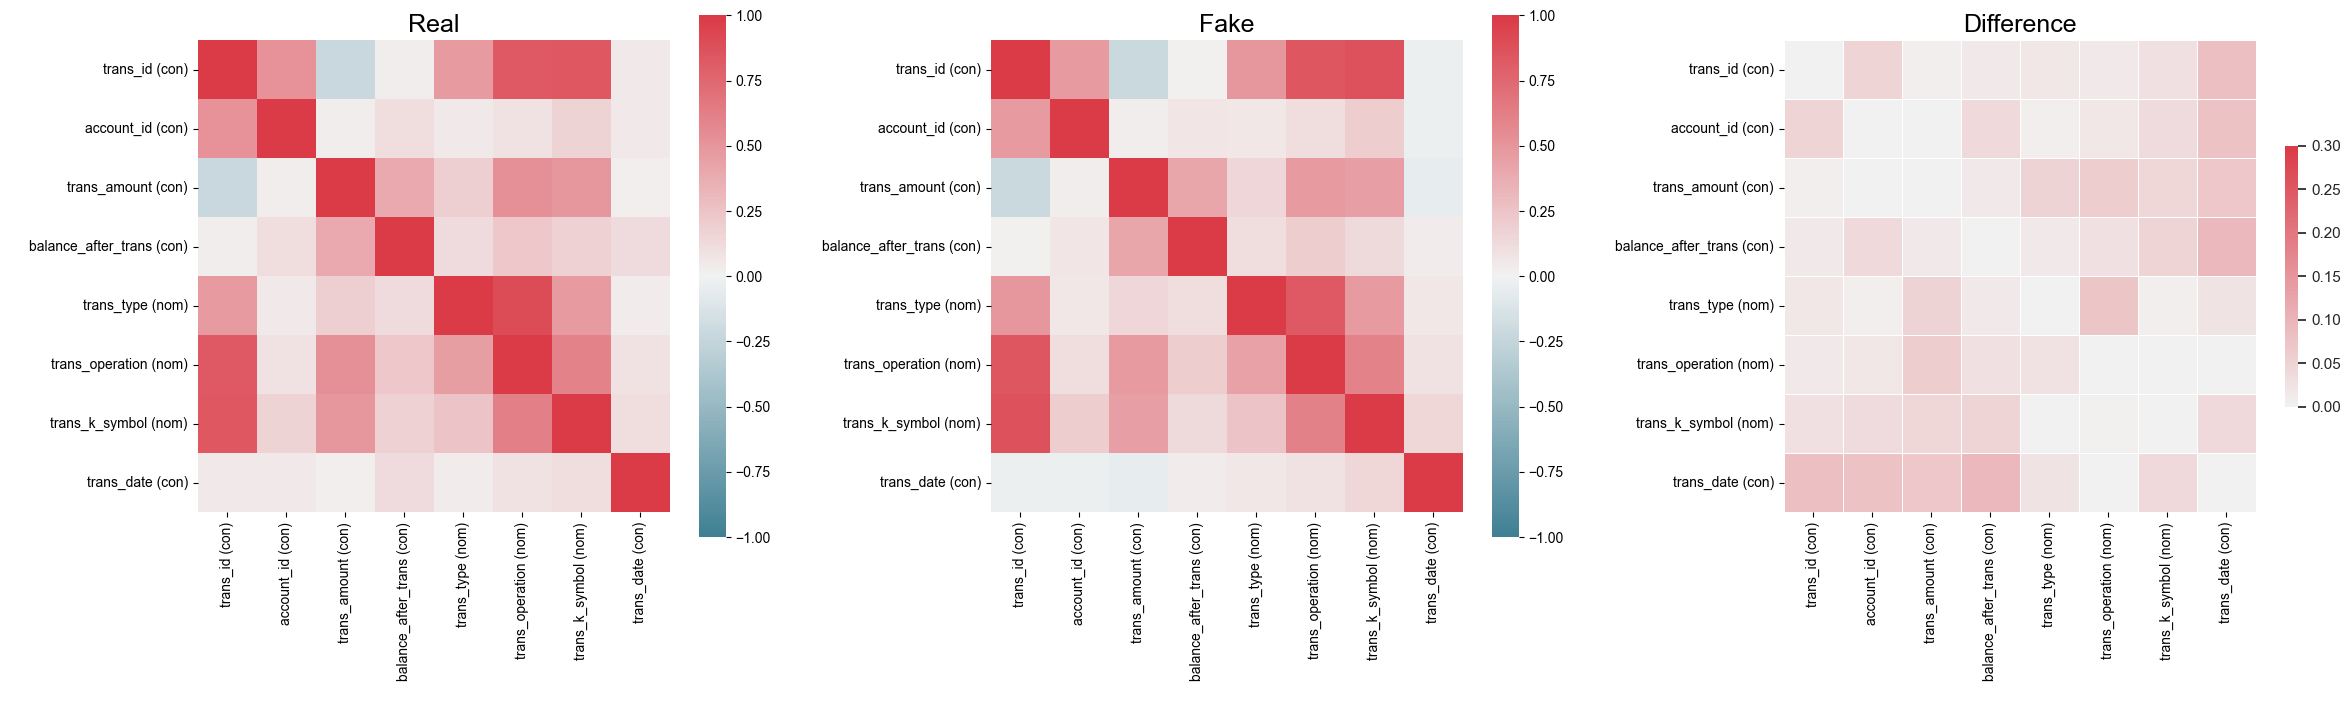

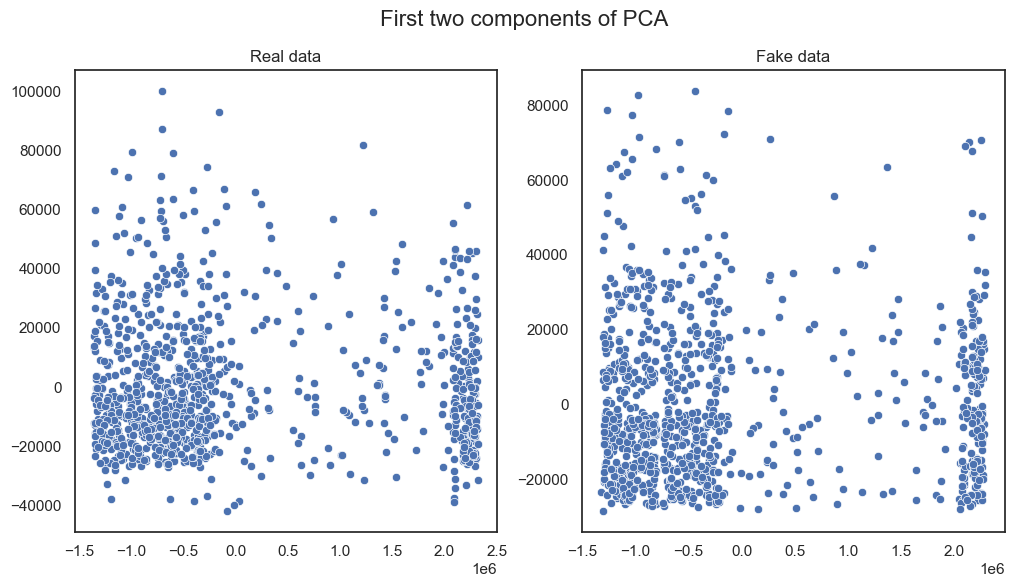

In [9]:
evaluator.visual_evaluation()